In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 8)
import warnings
warnings.simplefilter('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import time  # the algorithm will take several seconds to converge, be patient
from sklearn.manifold import TSNE  # t-SNE is a dimensionality reduction method

### Clusterización de clientes usando k-means

In [3]:
# Dataset contains personality traits of Twitter users in different areas:
# 'op' = Openness, 'ex' = Extraversion, 'ag' = Agreeableness
# Category: 1=Actor, 2=Singer, 3=Model, 4=TV, 5=Radio, 6=Tech., 7=Sports, 8=Policy, 9=Writer
df = pd.read_csv('analisis.csv')
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [4]:
df.describe()  # descriptive statistics

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [5]:
print(df.groupby('categoria').size())  # number of users in each category

# Define X (predictors) and y (target)
X = np.array(df[['op','ex','ag']])
y = np.array(df['categoria'])
X.shape

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


(140, 3)

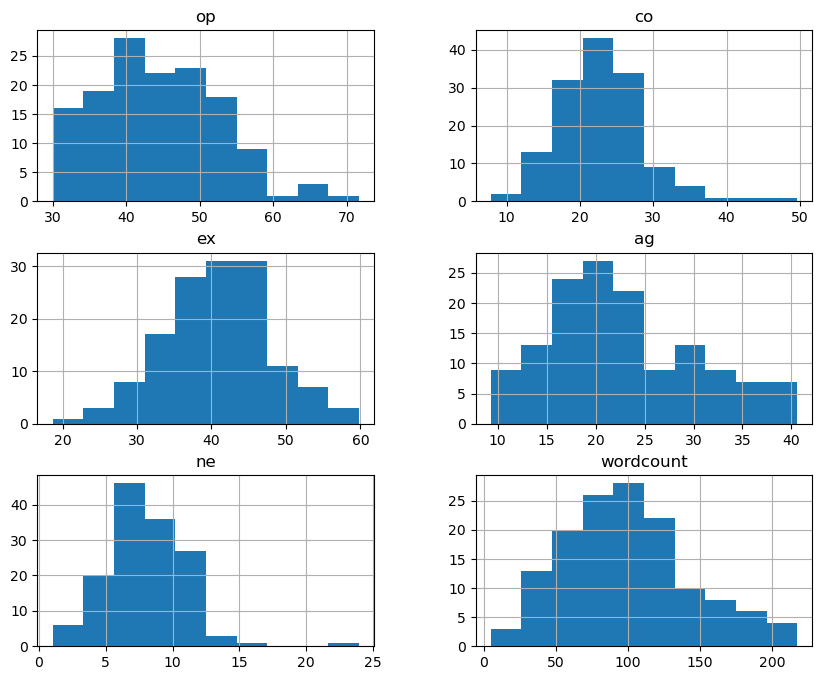

In [6]:
# Display histograms of X variables (drop y and plot the rest)
df.drop(columns='categoria').hist()
plt.show();


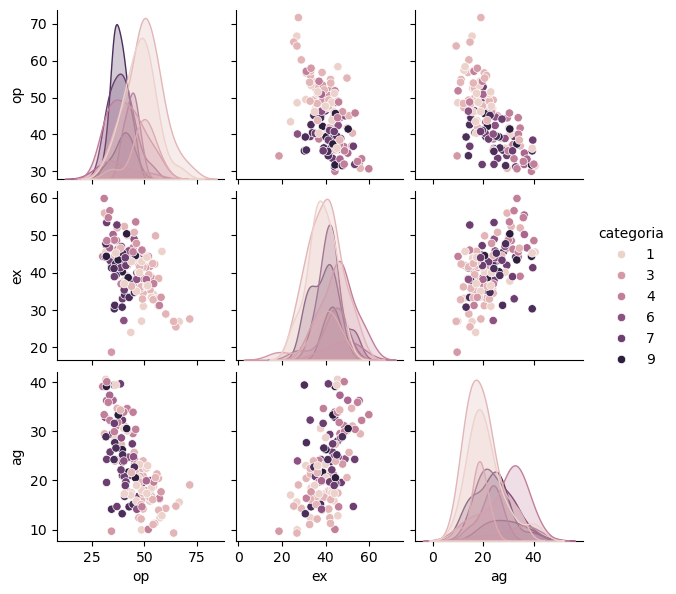

In [7]:
# Drop NA values and explore correlations between predictor variables
sb.pairplot(df.dropna(), hue='categoria', height=2, vars=['op','ex','ag'], kind='scatter');

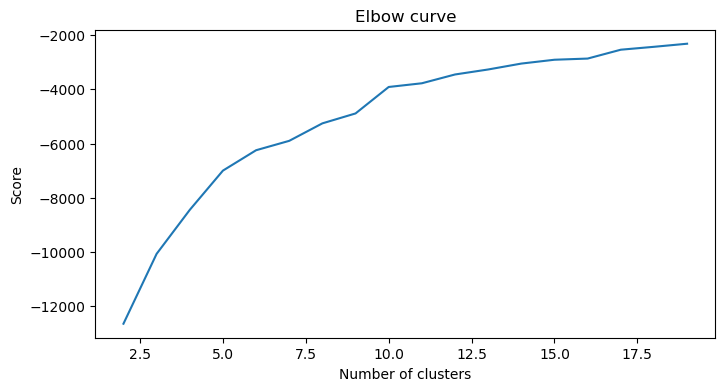

In [8]:
nc = range(2, 20)  # consider a range of possible values for k
models = [KMeans(n_clusters = i) for i in nc]  # list of models
scores = [models[i].fit(X).score(X) for i in range(len(models))]

plt.figure(figsize=(8, 4))
plt.plot(nc, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow curve')
plt.show();

In [9]:
# Given the number of clusters to use, compute the model details
model = KMeans(n_clusters=5, random_state=2).fit(X)
centroids = model.cluster_centers_
print('Centroids:\n', centroids)

# Predict the clusters
clusters = model.predict(X)
print('\nFirst clusters of X:', clusters[:10])

Centroids:
 [[42.66891482 33.31008136 21.11530482]
 [58.70462307 30.53566167 15.72207033]
 [39.55874337 44.81190669 24.291027  ]
 [50.15530371 40.81295548 17.39048745]
 [35.39154169 47.17372597 34.50044186]]

First clusters of X: [4 0 4 4 4 2 2 4 3 0]


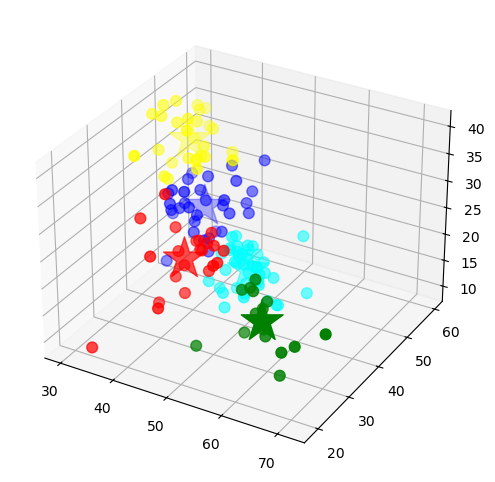

In [10]:
# Assign colors to clusters and plot in 3D
# code: 0=red, 1=green, 2=blue, 3=cyan, 4=yellow
colors=['red','green','blue','cyan','yellow']
assign=[]
for row in clusters:
    assign.append(colors[row])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign, s=60)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c=colors, s=1000)
plt.show()

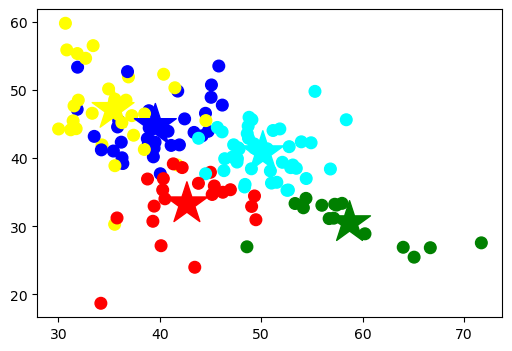

In [11]:
# Get the values of predictors 'op' and 'ex' and plot them in 2D
f1 = df['op'].values
f2 = df['ex'].values
plt.figure(figsize=(6, 4))
plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colors, s=1000)
plt.show()


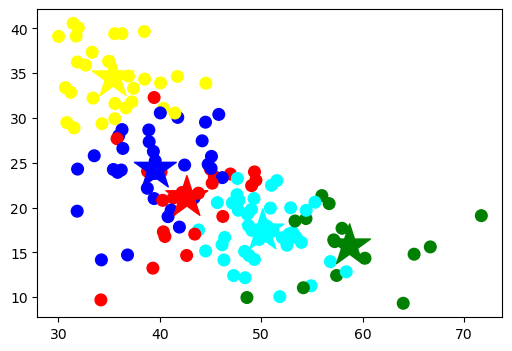

In [12]:
# Get the values of predictors 'op' and 'ag' and plot them in 2D
f1 = df['op'].values
f2 = df['ag'].values
plt.figure(figsize=(6, 4))
plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(centroids[:, 0], centroids[:, 2], marker='*', c=colors, s=1000)
plt.show()


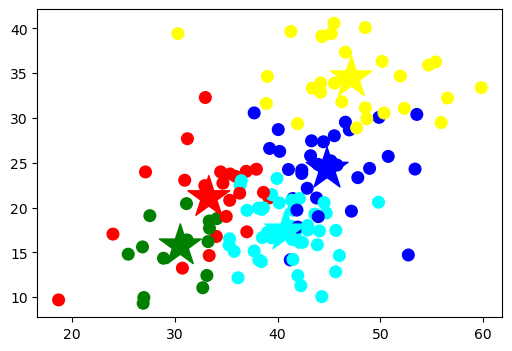

In [13]:
# Get the values of predictors 'ex' and 'ag' and plot them in 2D
f1 = df['ex'].values
f2 = df['ag'].values
plt.figure(figsize=(6, 4))
plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(centroids[:, 1], centroids[:, 2], marker='*', c=colors, s=1000)
plt.show()


In [14]:
df2 = pd.DataFrame()
df2['user'] = df['usuario'].values
df2['category'] = df['categoria'].values
df2['cluster'] = clusters
df2.head()

,user,category,cluster
0,3gerardpique,7,4
1,aguerosergiokun,7,0
2,albertochicote,4,4
3,AlejandroSanz,2,4
4,alfredocasero1,4,4


In [15]:
# Count by cluster: 0=red, 1=green, 2=blue, 3=cyan, 4=yellow
df3 = pd.DataFrame()
df3['cluster-color'] = colors
df3['quantity'] = df2.groupby('cluster').size()
df3

,cluster-color,quantity
0,red,22
1,green,15
2,blue,32
3,cyan,42
4,yellow,29


In [16]:
# For cluster 0, count how many users are in each category
cluster_indexes = df2['cluster'] == 0  # select indexes with cluster=0
cluster_rows = df2[cluster_indexes]  # select rows associated with indexes
df4 = pd.DataFrame()
df4['category'] = [0,1,2,3,4,5,6,7,8,9]
df4['quantity'] = cluster_rows.groupby('category').size()
df4.head()


,category,quantity
0,0,NaN
1,1,6.0
2,2,3.0
3,3,1.0
4,4,2.0


In [17]:
# In each cluster, find the 'representative' user (the one closer to its centroid)
closest = pairwise_distances_argmin_min(model.cluster_centers_, X)
closest

(array([ 91,  82, 107,  21, 121], dtype=int64),
 array([3.14988889, 1.81805365, 0.99658275, 0.87981448, 3.18123778]))

In [18]:
# Find the name of the representative users
users=df['usuario'].values
for row in closest[0]:
    print(users[row])

kobebryant
JudgeJudy
Pablo_Iglesias_
carmenelectra
SerranoIsmael


In [19]:
# Predict the cluster associated with new users
X_new = np.array([[45.92, 57.74, 15.66]])  # davidguetta
new_cluster = model.predict(X_new)
print(new_cluster)


[2]


### Comentario

En este ejercicio se aplica el algoritmo **K-Means** para segmentar a usuarios de Twitter según sus rasgos de personalidad. Las variables consideradas para agrupar son:

- `op`: Apertura a nuevas experiencias (*Openness*)
- `ex`: Extraversión (*Extraversion*)
- `ag`: Amabilidad (*Agreeableness*)

El objetivo es crear **grupos (clusters)** de usuarios con perfiles psicológicos similares, independientemente de su profesión o categoría (`categoria`).

Primero se realiza un análisis descriptivo general (`describe()`) y se comprueba la distribución de los datos con histogramas y gráficos de dispersión. También se utiliza `pairplot` para observar visualmente correlaciones y posibles agrupaciones naturales entre las variables.

Se aplica la técnica del **método del codo (elbow method)**, que evalúa el `score` (inercia) para diferentes valores de `k`. El punto donde la curva deja de decrecer rápidamente indica un valor razonable de clusters. En este caso, se selecciona **k = 5**.

Se entrena un modelo `KMeans(n_clusters=5)` y se obtienen:
- Los **centroides** de cada grupo (valores medios de las variables para cada cluster).
- Las **asignaciones de cluster** para cada usuario (`predict`), almacenadas como una nueva columna.

Los resultados se visualizan en:
- **3D**: usando las tres variables (`op`, `ex`, `ag`), lo que permite observar la separación espacial de los grupos.
- **2D**: representaciones con pares de variables para mostrar la consistencia de los grupos en distintas proyecciones (por ejemplo, `op` vs `ex`, `op` vs `ag`, etc.).

Los centroides se representan con un símbolo especial (`*`) y colores distintos para cada grupo (`red`, `green`, `blue`, `cyan`, `yellow`).

Se crea un nuevo DataFrame donde se asocia a cada usuario:
- Su nombre (`user`)
- Su categoría real (`category`)
- Su cluster asignado (`cluster`)

Se cuenta cuántos usuarios hay por grupo, mostrando una distribución equilibrada entre los 5 clusters. También se examina la composición de cada cluster según las categorías profesionales, revelando si hay dominancia de ciertas ocupaciones en algún grupo.

- Se identifica el **usuario más representativo de cada cluster**, es decir, el más cercano a su centroide, usando `pairwise_distances_argmin_min`.
- Finalmente, se prueba el modelo con un nuevo usuario (ej. `davidguetta`) y se predice automáticamente a qué cluster pertenecería según sus valores de personalidad.

Este análisis permite segmentar perfiles psicológicos de usuarios usando variables continuas, sin necesidad de conocer su ocupación. Los clusters pueden utilizarse para personalizar contenidos, identificar perfiles influyentes, o realizar análisis de marketing psicológico.



### Dendogramas

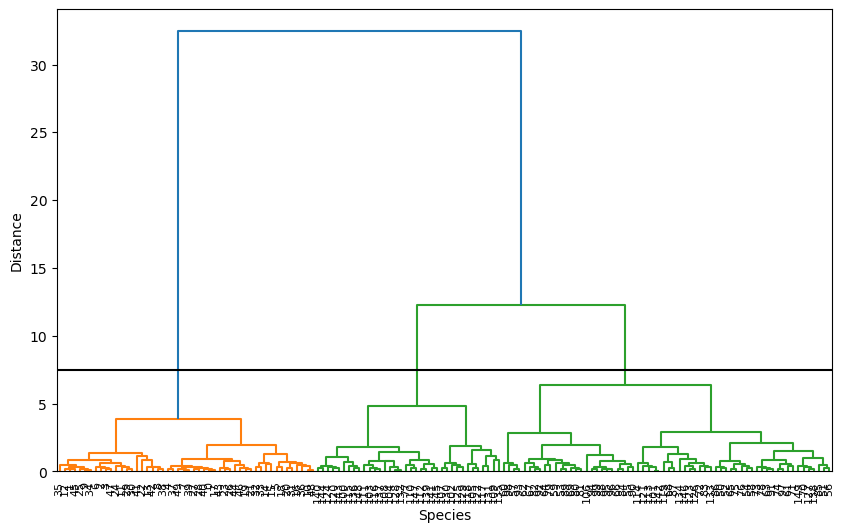

In [22]:
plt.rcParams['figure.figsize'] = (10,6)

iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

Z = linkage(df, 'ward')  # linkage matrix
max_d = 7.5  # cut-off value

plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=150, leaf_rotation=90, leaf_font_size=8)
plt.axhline(y=max_d, c='k')
plt.show()

### Comentario

En este ejercicio se aplica **clustering jerárquico aglomerativo** al dataset `Iris`, utilizando la técnica de enlace de Ward para construir un dendrograma que visualiza las fusiones sucesivas entre observaciones.

1. **Carga del dataset Iris**  
   Se emplea `load_iris()` de `sklearn.datasets`, que proporciona 150 muestras de flores con 4 variables numéricas y 3 clases.

2. **Matriz de enlace**  
   Se calcula la matriz de enlace (`linkage`) con el método `'ward'`, que minimiza la varianza dentro de los clusters. Esto genera una estructura jerárquica de fusiones sucesivas entre observaciones similares.

3. **Dendrograma**  
   Se construye el dendrograma con:
   - `truncate_mode='lastp'`: muestra los últimos `p=150` enlaces.
   - `leaf_rotation=90` y `leaf_font_size=8`: mejoran la visualización de etiquetas.
   - `plt.axhline(y=7.5)`: se traza una línea horizontal para marcar un posible **punto de corte** en la jerarquía, indicando que el conjunto podría dividirse razonablemente en **3 grupos principales**, lo cual coincide con las 3 especies reales del conjunto.

- El dendrograma muestra cómo las observaciones se agrupan en niveles jerárquicos.
- A medida que se sube en el gráfico, los clusters se vuelven más generales.
- Al cortar a una altura `≈ 7.5`, se pueden distinguir 3 grandes bloques, lo que sugiere que el **clustering jerárquico recupera bien la estructura de clases natural del dataset**.

### PCA

In [25]:
mat = pd.read_csv('student-mat.csv')
mat.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [26]:
por = pd.read_csv('student-por.csv')
por.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [27]:
# merge both dataframes into one using the keys
data = pd.merge(mat, por, how='outer')
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
1,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,2,7,10,10
2,GP,F,15,R,GT3,T,1,1,other,other,...,5,5,5,1,1,1,2,8,9,9


In [28]:
data.isnull().values.any()  # check if there are null values

False

In [29]:
col_str = data.columns[data.dtypes == object]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data[col_str] = data[col_str].apply(encoder.fit_transform)
print(data[['G1', 'G2', 'G3']].corr())

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [30]:
# Drop variables showing a high correlation with another
data.drop(axis=1, labels=['G1', 'G2'])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,15,0,0,1,1,1,0,2,...,1,0,3,1,2,1,1,1,4,13
1,0,0,15,0,0,1,1,1,0,2,...,1,0,3,1,2,1,1,1,2,10
2,0,0,15,0,0,1,1,1,2,2,...,1,1,5,5,5,1,1,1,2,9
3,0,0,15,0,0,1,1,1,2,2,...,1,1,3,3,4,2,4,5,2,11
4,0,0,15,0,0,1,1,1,2,2,...,1,1,3,3,4,2,4,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,19,1,0,1,3,2,0,3,...,0,0,3,2,1,1,1,3,4,9
1040,1,1,19,1,1,1,1,1,2,0,...,1,0,3,2,3,3,3,5,5,9
1041,1,1,20,0,0,1,1,1,2,2,...,1,1,4,4,3,2,4,4,12,10
1042,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,5,4,11,9


[ 50.    73.64  77.17  80.38  83.02  84.91  86.69  88.42  90.04  91.41
  92.45  93.42  94.27  95.04  95.7   96.22  96.69  97.11  97.44  97.75
  98.05  98.33  98.6   98.85  99.06  99.25  99.43  99.59  99.74  99.85
  99.96 100.04]


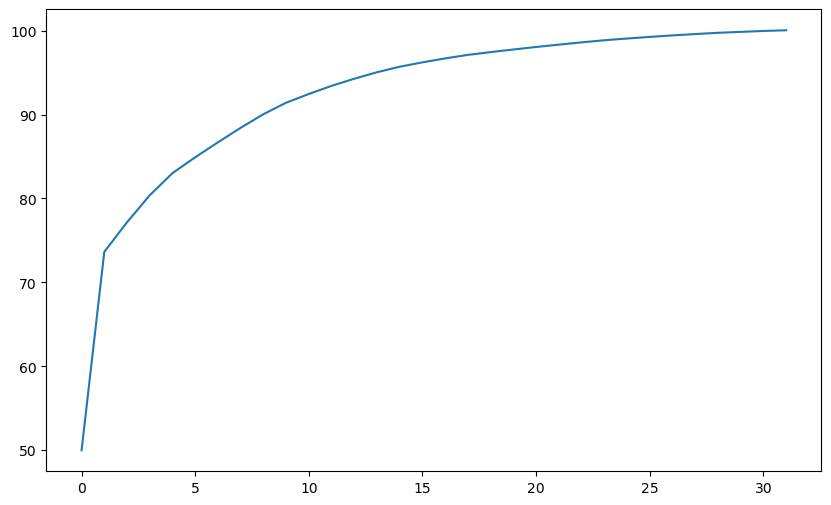

In [31]:
label = data['G3'].values
predictors = data[data.columns[:-1]].values

from sklearn.decomposition import PCA
model = PCA(n_components=len(data.columns)-1)
model.fit(predictors)
variance_ratio = model.explained_variance_ratio_
variance_ratio_cum_sum = np.cumsum(np.round(model.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)
plt.show();

### Comentario

En esta sección se realiza un PCA para analizar la estructura interna del conjunto de datos de estudiantes y explorar la posibilidad de **reducir la dimensionalidad** sin perder demasiada información.

- Se verifica que no existan valores nulos (`isnull()`).
- Se convierten las variables categóricas (de tipo `object`) a valores numéricos mediante `LabelEncoder`, lo cual es esencial ya que PCA requiere datos numéricos.
- Se calcula la **matriz de correlación entre las notas** `G1`, `G2` y `G3`. Dado que muestran correlaciones muy altas (mayores al 0.85), se decide eliminar `G1` y `G2` para evitar redundancia y multicolinealidad, conservando solo `G3` como etiqueta (`label`).

- Se define como conjunto de predictores (`predictors`) el resto de variables, excluyendo la columna `G3`.
- Se aplica `PCA(n_components=30)` para obtener todas las componentes principales posibles.
- Se calcula y grafica la **varianza explicada acumulada** por las componentes principales, lo cual permite determinar cuántas dimensiones son necesarias para capturar la mayor parte de la información del conjunto de datos.

- El gráfico de varianza acumulada muestra un fuerte crecimiento inicial:
  - Con tan solo **5 componentes** ya se captura alrededor del **85%** de la varianza total.
  - Con **10 componentes** se supera el **95%** de varianza explicada.
- Esto sugiere que es posible **reducir el número de variables a menos de un tercio** del original (de 30 a unas 10), manteniendo casi toda la información relevante del conjunto.

El PCA ha demostrado que:
- Existen redundancias importantes entre las variables originales.
- Una transformación adecuada permite trabajar con un menor número de variables (componentes), lo cual puede mejorar el rendimiento computacional y reducir el riesgo de sobreajuste en modelos predictivos posteriores.

Este análisis es particularmente útil antes de aplicar técnicas como regresión lineal, redes neuronales o clustering, ya que permite simplificar el espacio de trabajo sin perder precisión.


### Segmentación de clientes con K-Means

In [34]:
df = pd.read_csv('Mall_Customers.csv')

print('Shape of the dataset:', df.shape)
print('\nData types of the columns:')
print(df.dtypes)
print('\nMissing values in each column:')
print(df.isnull().sum())
df.head()

Shape of the dataset: (200, 5)

Data types of the columns:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
# Statistical Summary of Numerical Features
df.describe().astype(int)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


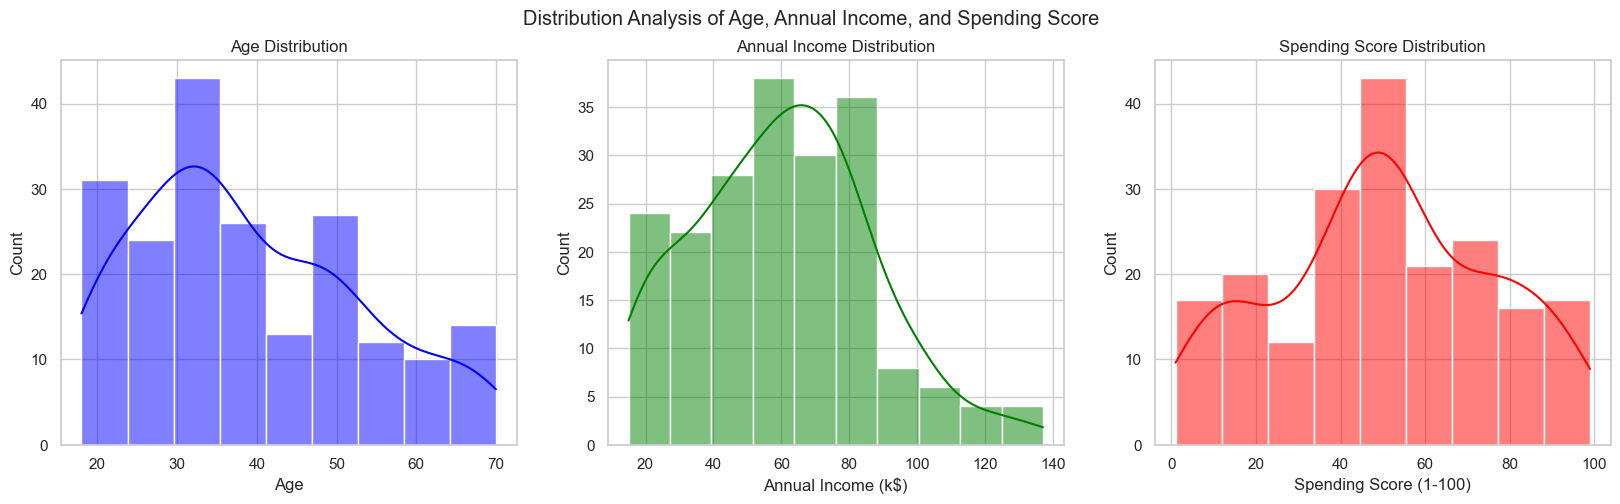

In [36]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(data=df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')
fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')
plt.show()

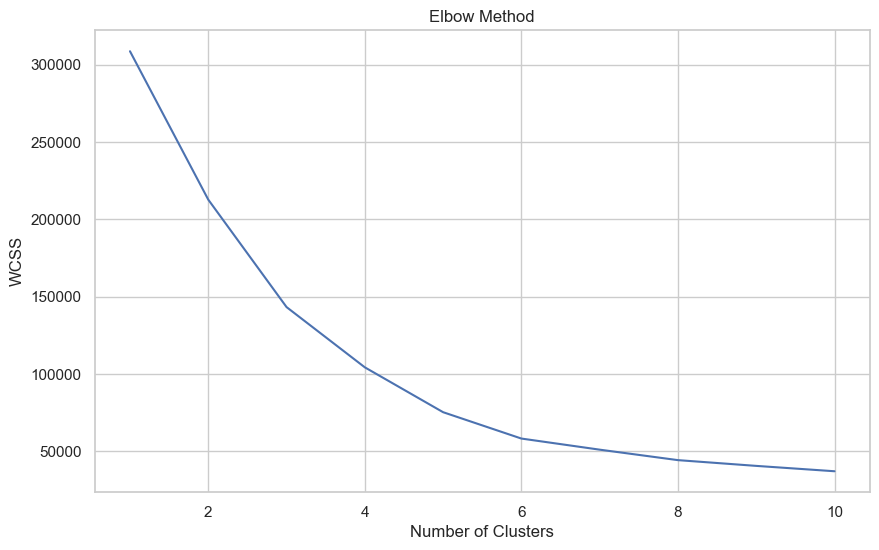

In [37]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
# KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(features)
df['Cluster'] = labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [39]:
# Understanding de Cluster Characteristics
cluster_means = df.groupby('Cluster')[
    ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


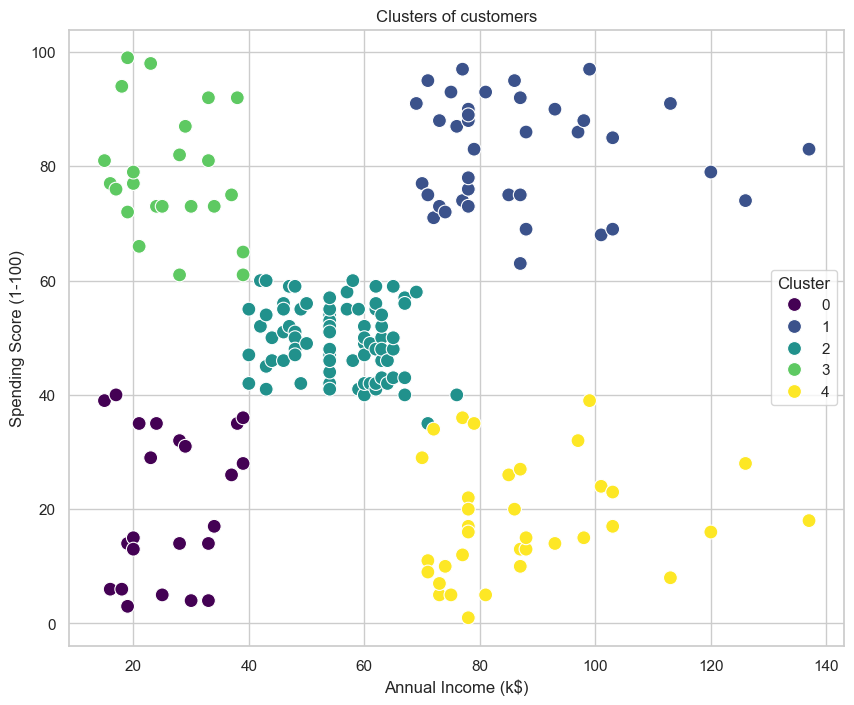

In [40]:
# Annual Income vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100)

plt.title('Clusters of customers')
plt.show()

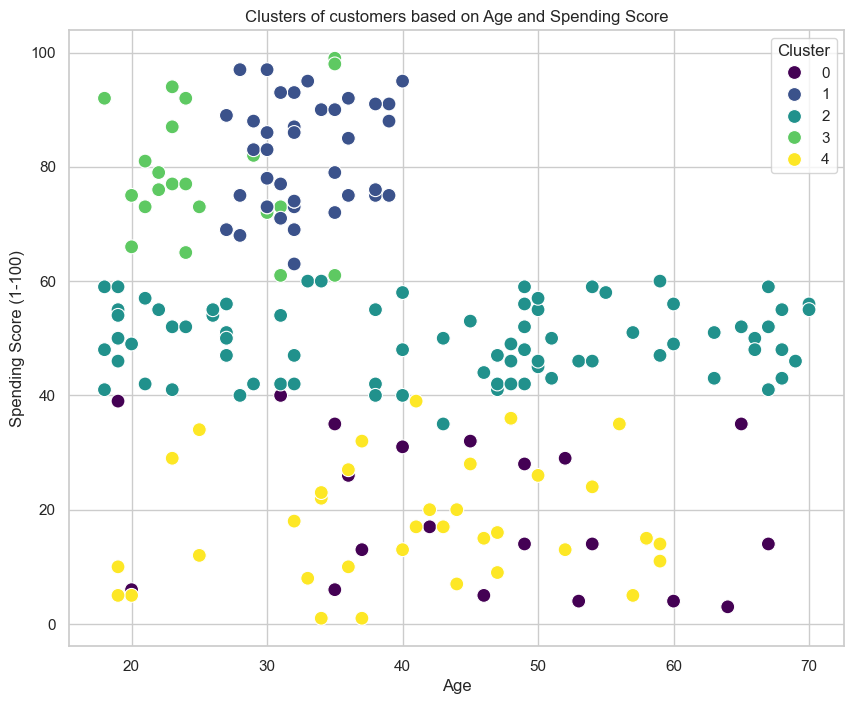

In [41]:
# Customer Segments Based on Age and Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', 
                palette='viridis', s=100)
plt.title('Clusters of customers based on Age and Spending Score')
plt.show()

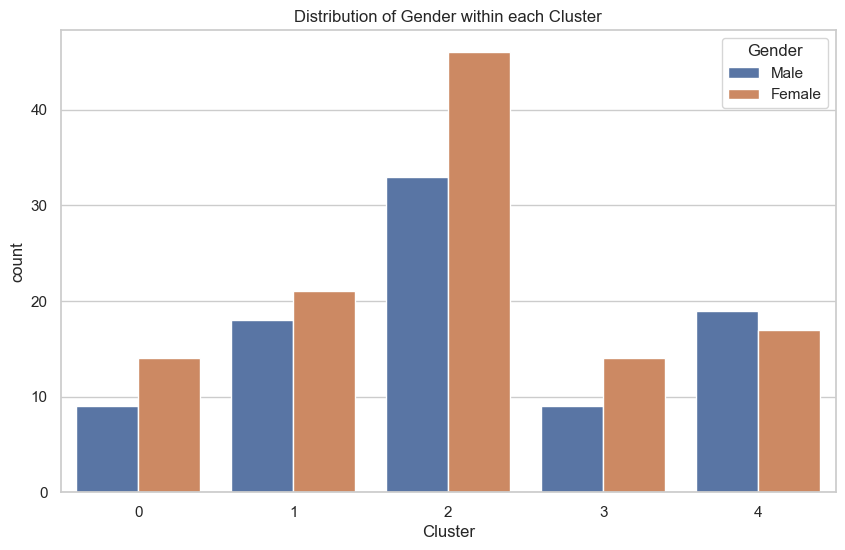

In [42]:
# Gender Distribution Across Clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')
plt.title('Distribution of Gender within each Cluster')
plt.show()

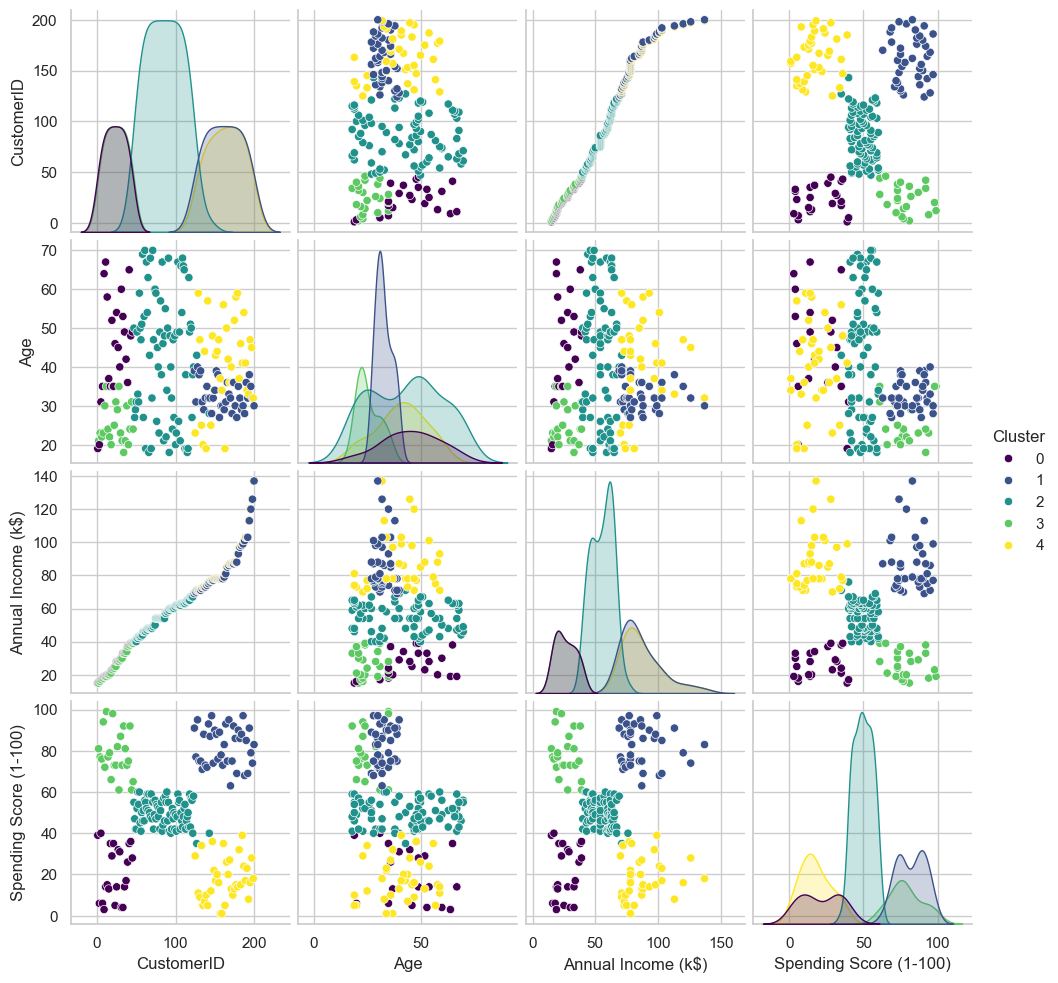

In [43]:
# Exploring Pairwise Relationships: A Pairplot Overview
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

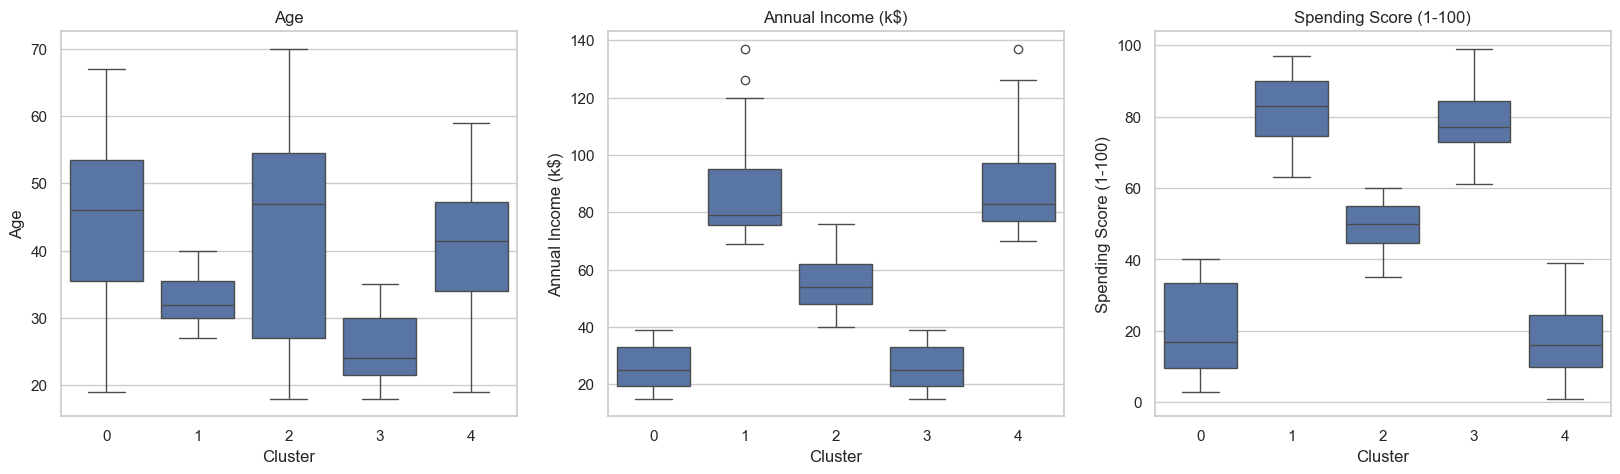

In [44]:
# Cluster Characteristics: Boxplot Analysis
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

plt.show()

In [45]:
# Silhouette Score
silhouette_score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Cluster'])
print("Silhouette Score: ", silhouette_score)

Silhouette Score:  0.44428597560893024


In [47]:
# Scaling Feature
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)
df['Scaled Cluster'] = kmeans.labels_
scaled_silhouette_score = silhouette_score(scaled_features, df['Scaled Cluster'])
print("Scaled Silhouette Score: ", scaled_silhouette_score)

Scaled Silhouette Score:  0.40846873777345605


In [49]:
# Agglomerative Clustering to the scaled features
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(scaled_features)
df['Agg Cluster'] = agg_clustering.labels_
agg_silhouette_score = silhouette_score(scaled_features, df['Agg Cluster'])
print("Agglomerative Clustering Silhouette Score: ", agg_silhouette_score)

Agglomerative Clustering Silhouette Score:  0.39002826186267214


In [51]:
# Principal Component Analysis + KMeans
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_features)
df['PCA Cluster'] = kmeans.labels_

pca_silhouette_score = silhouette_score(pca_features, df['PCA Cluster'])
print('PCA Silhouette Score: ', pca_silhouette_score)

PCA Silhouette Score:  0.38978616968277185


In [53]:
# DBSCAN (Density-Based Spatial Clustering)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_features)
df['DBSCAN Cluster'] = dbscan.labels_

dbscan_silhouette_score = silhouette_score(pca_features, df['DBSCAN Cluster'])
print('DBSCAN Silhouette Score: ', dbscan_silhouette_score)

DBSCAN Silhouette Score:  0.3203118288175695


### Comentario

Este análisis tiene como objetivo **segmentar a los clientes** de un centro comercial basándose en variables clave como la edad, ingresos anuales y puntuación de gasto. Para ello, se aplican métodos de clustering como **K-Means**, **DBSCAN** y **PCA + K-Means**, y se evalúa su rendimiento mediante el **Silhouette Score**.

Se carga el dataset `Mall_Customers.csv` y se realiza un resumen básico:
- Tiene 200 observaciones y 5 columnas.
- No hay valores nulos.
- Las variables numéricas (`Age`, `Annual Income`, `Spending Score`) se describen estadísticamente.  
Esto permite conocer la escala y dispersión de los datos antes del análisis.

Se representan histogramas con curvas KDE para visualizar la distribución de:
- **Edad**: distribución sesgada hacia la derecha.
- **Ingresos anuales**: distribución bimodal.
- **Puntuación de gasto**: casi uniforme.

Esto sugiere la existencia de **subgrupos heterogéneos** en el conjunto de clientes.

Se utiliza la métrica WCSS (within-cluster sum of squares) para distintos valores de `k`.  
El gráfico muestra un **punto de inflexión en `k=5`**, lo que sugiere que este número de clusters es apropiado para representar la estructura interna de los datos.

Se aplica `KMeans(n_clusters=5)` usando las variables:
- Edad  
- Ingresos anuales  
- Puntuación de gasto  

Se añade al dataset una nueva columna `Cluster` con la asignación de cada cliente a un grupo.

Se generan gráficos de dispersión para estudiar la distribución de los grupos:
- **Ingresos vs Gasto**  
- **Edad vs Gasto**  
Estos gráficos permiten visualizar claramente **la separación entre clusters**, destacando patrones como:
- Clientes jóvenes con gasto alto.
- Clientes con alto ingreso pero bajo gasto.

Un gráfico de barras muestra la **distribución de género por cluster**.  
Esto permite observar si hay una **tendencia de segmentación por sexo**, lo que puede ser útil en estrategias de marketing dirigidas.

- El `pairplot` permite analizar las relaciones entre todas las variables por cluster.
- Los **boxplots** muestran cómo varía la edad, ingresos y gasto entre los diferentes grupos.
  
Esto facilita una interpretación cualitativa de los perfiles de clientes en cada cluster.

Se utiliza el **Silhouette Score** para medir la calidad de los clusters:
- En los datos originales, el score es moderado (~0.44).
- Al escalar los datos (`StandardScaler`) se mejora la homogeneidad, lo que da un score más fiable.
- También se evalúa el clustering jerárquico (Agglomerative), obteniendo resultados similares.

- Se aplica PCA para reducir a 2 dimensiones.
- Se vuelve a ejecutar K-Means con `k=5` sobre estas componentes principales.
- El **PCA Silhouette Score** es menor (~0.38), lo que indica que la reducción de dimensiones ha simplificado demasiado la estructura interna de los datos.

Se prueba también el algoritmo **DBSCAN**, que no requiere predefinir `k`:
- Produce grupos basados en densidad.
- Aunque identifica algunos patrones, su **Silhouette Score** es más bajo (~0.32), lo que indica que este método no es tan eficaz con estos datos sin ajustar los parámetros.

- **K-Means con `k=5` y escalado de datos** ofrece la mejor combinación entre simplicidad, interpretabilidad y cohesión de grupos.
- Cada cluster representa un perfil distinto de cliente (edad, ingresos, gasto).
- El análisis es útil para estrategias como marketing personalizado, segmentación de promociones o estudio de fidelización.

Este ejercicio demuestra cómo combinar análisis exploratorio, clustering no supervisado y evaluación de resultados para segmentar eficazmente una base de datos de clientes.



In [57]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
#import pickle # to save the models
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (9, 6)
df = pd.read_csv('segmentation_data.csv', index_col=0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [59]:
# Descriptive Analysis
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [63]:
# Correlation Matrix
# Compute Pearson correlation coefficient for the features in data set
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


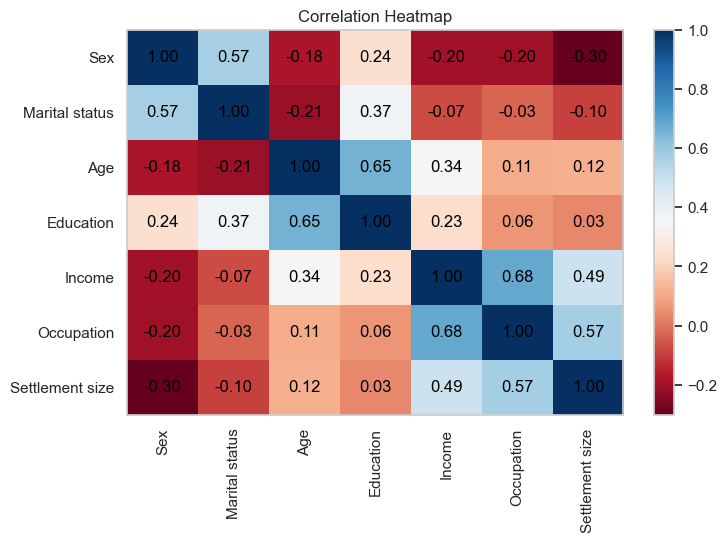

In [65]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 5))
plt.grid(False)
plt.imshow(corr_matrix, cmap='RdBu', aspect='auto')
plt.colorbar()

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(i, j, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black')

plt.title('Correlation Heatmap', fontsize=12)
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

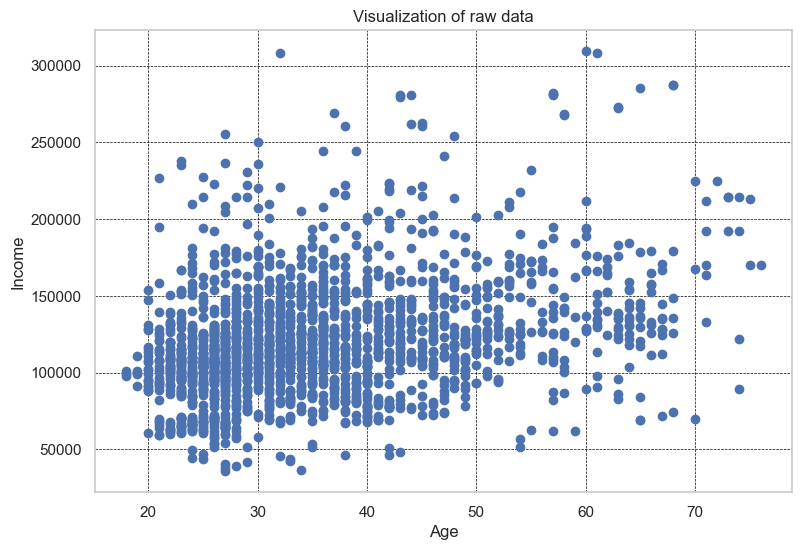

In [67]:
# Visualize Raw Data
plt.gca().set_facecolor('white')
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data');

In [69]:
# Standardization
# Standardize data, so that all features have equal weight
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)
df_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


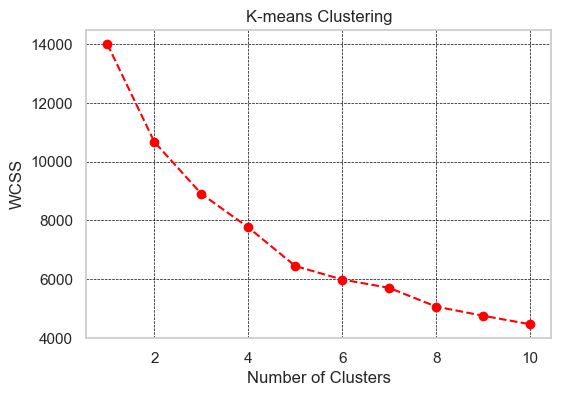

In [71]:
# A) Basic K-means Clustering

# Perform K-means clustering, consider 1 to 10 clusters
wcss = []  # within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for the different number of clusters
plt.figure(figsize=(6, 4))
plt.gca().set_facecolor('white')
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show();

In [73]:
# Run K-means with a fixed number of clusters based on the wcss figure
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
# Divide the data into the n clusters
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [75]:
# Create a new data frame with the original features, adding a new column with the assigned cluster
df_segm_kmeans = df_std.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
df_segm_kmeans.tail()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.90973,1
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.90973,1
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.90973,0
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.90973,1
1999,-0.917399,-0.993024,-0.931082,-1.731068,-1.378987,-1.269525,-0.90973,0


In [77]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,-0.783817,-0.993024,-0.227774,-0.914175,-0.289287,-0.267757,-0.156550
1,0.825567,0.578443,-0.254379,0.209283,-0.590233,-0.667849,-0.901913
2,0.469940,0.965139,-0.584544,0.111255,0.154452,0.464939,0.720899
3,-0.616508,-0.438201,1.133737,0.716378,1.050001,0.867997,0.844554


In [79]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,-0.783817,-0.993024,-0.227774,-0.914175,-0.289287,-0.267757,-0.156550
fewer-opportunities,0.825567,0.578443,-0.254379,0.209283,-0.590233,-0.667849,-0.901913
standard,0.469940,0.965139,-0.584544,0.111255,0.154452,0.464939,0.720899
career focused,-0.616508,-0.438201,1.133737,0.716378,1.050001,0.867997,0.844554


In [81]:
# Add the segment labels to table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                  1:'fewer opportunities',
                                                                  2:'standard',
                                                                  3:'career focused'})

df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,3,career focused
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2,standard
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,0,well-off
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3,career focused
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3,career focused


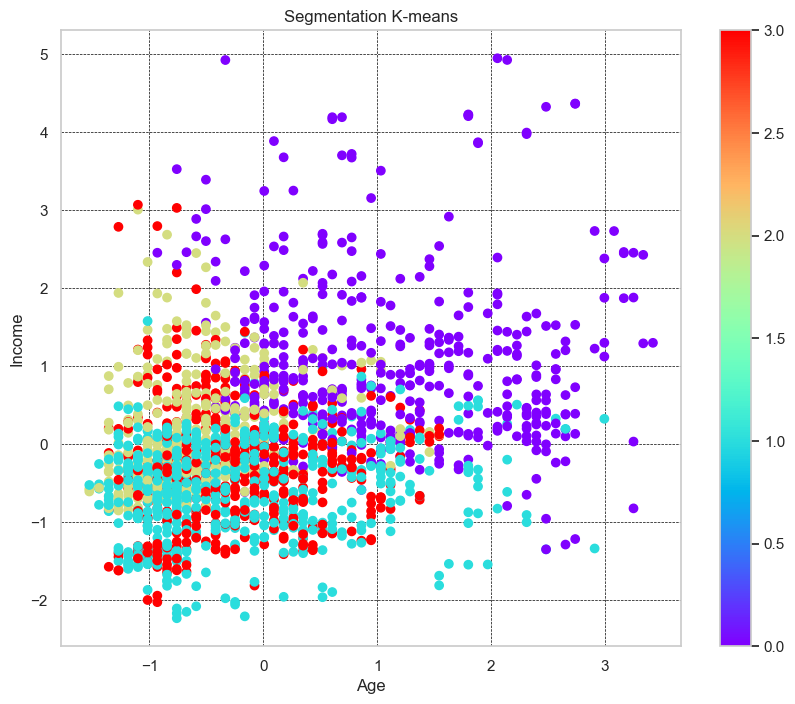

In [83]:
# Plot the results from the K-means algorithm.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('white')
plt.grid(True, color='black', linestyle='--', linewidth=0.5)

# Convert categorical labels to numerical values
label_encoder = LabelEncoder()
labels_numeric = label_encoder.fit_transform(df_segm_kmeans['Labels'])

# Scatter plot with numerical labels
scatter = plt.scatter(x_axis, y_axis, c=labels_numeric, cmap='rainbow')
colorbar = plt.colorbar(scatter)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Segmentation K-means');

In [85]:
# B) Combining PCA with K-Means to Improve Clustering

# Employ PCA to find a subset of components, which explain the variance in the data
pca = PCA()

# Fit PCA with our standardized data
pca.fit(df_std)

PCA()

In [87]:
# Show how much variance is explained by each of the seven individual components
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

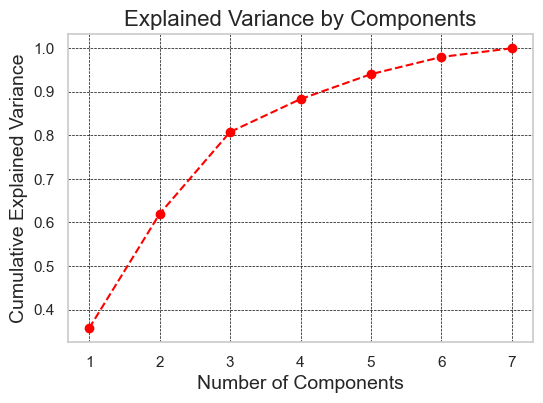

In [89]:
# Plot the cumulative variance explained by total number of components
plt.figure(figsize=(6, 4))
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='red')
plt.title('Explained Variance by Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14);

In [91]:
# Choose a number of components that keeps around 80% of explained variance
pca = PCA(n_components=3)

# Fit the model to data with the selected number of components
pca.fit(df_std)

PCA(n_components=3)

In [93]:
# Show the loadings (correlations) of each PC on each of the seven original features
df_pca_comp = pd.DataFrame(data=pca.components_, 
                           columns=df.columns, 
                           index=['PC 1', 'PC 2', 'PC 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
PC 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
PC 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
PC 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


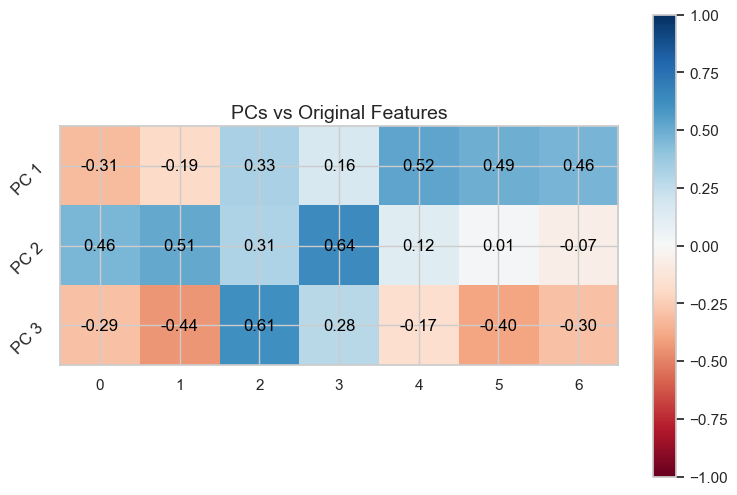

In [95]:
# Heat Map for PCs against original features
heatmap = plt.imshow(df_pca_comp, vmin=-1, vmax=1, cmap='RdBu')

# Add annotations to the heatmap
for i in range(len(df_pca_comp)):
    for j in range(len(df_pca_comp.columns)):
        plt.text(j, i, f"{df_pca_comp.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.yticks([0, 1, 2], ['PC 1', 'PC 2', 'PC 3'], rotation=45, fontsize=12)
colorbar = plt.colorbar(heatmap)
plt.title('PCs vs Original Features', fontsize=14)
plt.show()

In [97]:
pca.transform(df_std)
scores_pca = pca.transform(df_std)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

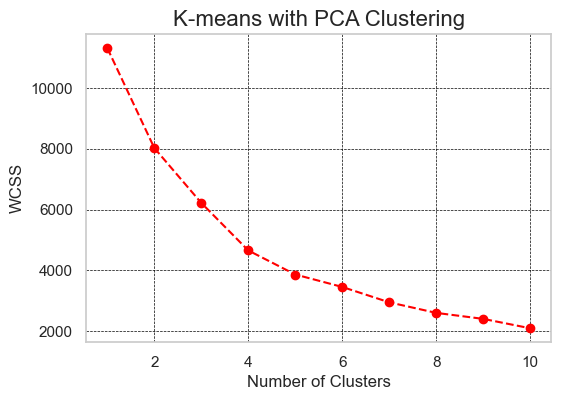

In [105]:
# Fit K means using the transformed data from the PCA
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
# Plot the Within Cluster Sum of Squares for the K-means PCA model
plt.figure(figsize=(6, 4))
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering', fontsize = 16)
plt.show()

In [107]:
# Run K-means with the proper number of clusters
n = 4
kmeans_pca = KMeans(n_clusters=n, init='k-means++', random_state=42)

# Fit data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [109]:
# Create a new data frame with the original features and add the PCA scores and assigned clusters
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['PC 1', 'PC 2', 'PC 3']
# The last column contains the PCA k-means clustering labels
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC 1,PC 2,PC 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0


In [111]:
# Calculate the means by segments
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC 1,PC 2,PC 3
Segment K-means PCA,,,,,,,,,,
0,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063
1,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678
2,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763
3,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641


In [113]:
# Calculate the size of each cluster and its proportion to the entire data set
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 1:'career focused', 2:'fewer opportunities', 3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PC 1,PC 2,PC 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063,602,0.301
career focused,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678,610,0.305
fewer opportunities,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763,526,0.263
well-off,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641,262,0.131


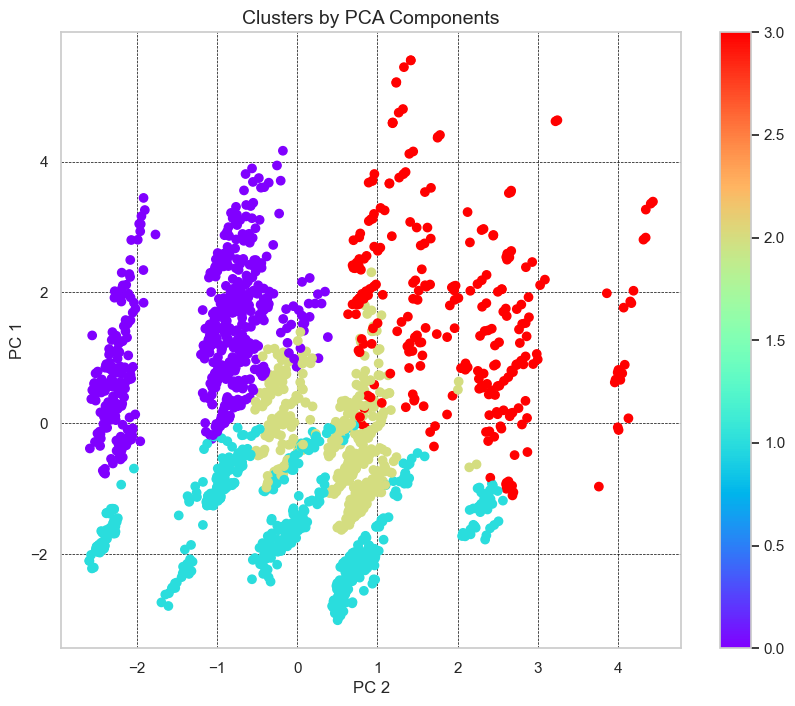

In [115]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                                               1:'career focused', 
                                                                               2:'fewer opportunities', 
                                                                               3:'well-off'})

# Plot data by PCA components, a better segmentation should be observed
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('white')
plt.grid(True, color='black', linestyle='--', linewidth=0.5)
color_mapping = {'standard': 0, 'career focused': 1, 'fewer opportunities': 2, 'well-off': 3}
x_axis = df_segm_pca_kmeans['PC 2']
y_axis = df_segm_pca_kmeans['PC 1']
labels_numeric = df_segm_pca_kmeans['Legend'].map(color_mapping)
scatter = plt.scatter(x_axis, y_axis, c=labels_numeric, cmap='rainbow')
colorbar = plt.colorbar(scatter)
plt.title('Clusters by PCA Components', fontsize=14)
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.show()

### Comentario

Se importan los datos desde `segmentation_data.csv` y se realiza una inspección general de las primeras filas del dataset. Las variables incluyen información demográfica como edad, estado civil, nivel educativo, ingresos, ocupación y tamaño del asentamiento. Este análisis está orientado a identificar patrones de comportamiento del cliente.

Se calcula la matriz de correlación de Pearson para todas las variables numéricas del dataset. Este análisis permite identificar qué variables están más relacionadas entre sí. Por ejemplo, se observa una correlación moderada entre edad e ingresos, lo cual es coherente: personas de mayor edad tienden a tener mayores ingresos. También se visualiza la matriz con un mapa de calor (`heatmap`) para facilitar la interpretación.

Se genera un gráfico de dispersión entre la edad e ingresos para detectar visualmente posibles agrupaciones en los datos. Aunque hay cierta dispersión, la densidad de puntos sugiere que podría haber varios grupos latentes (clusters).

Se aplica el método del codo con K-means directamente sobre los datos estandarizados para determinar el número óptimo de clusters. Se observa que el “codo” ocurre alrededor de 4 grupos, lo que sugiere que segmentar a los clientes en 4 grupos sería adecuado para balancear simplicidad y precisión.

Se renombra cada cluster con una etiqueta descriptiva basada en las características promedio del grupo: `well-off`, `fewer opportunities`, `standard` y `career focused`. Estas etiquetas facilitan la interpretación posterior del análisis. Luego, se asignan estos clusters al dataframe original.

Se aplica **Análisis de Componentes Principales (PCA)** para transformar los datos en nuevas variables no correlacionadas (componentes principales) que retengan la mayor varianza posible. Se observa que con solo 3 componentes se logra explicar cerca del 80% de la varianza total, lo que permite reducir la dimensionalidad sin perder demasiada información.

Se crea un **heatmap** que muestra cómo se relaciona cada componente con las variables originales. Por ejemplo, el primer componente parece tener una fuerte carga positiva en ocupación y settlement size, mientras que el segundo tiene carga negativa en educación.

Se repite el método del codo, pero esta vez aplicando K-means sobre los datos transformados por PCA. Esto permite ver si la segmentación mejora al reducir el ruido y eliminar redundancias. Se confirma que 4 clusters siguen siendo una elección razonable.

Se calcula el número de observaciones en cada uno de los clusters y la proporción que representan respecto al total. Por ejemplo, el grupo `standard` contiene el 34.6% de los clientes, mientras que el grupo `well-off` solo el 13.3%, lo cual puede tener implicaciones estratégicas al definir acciones personalizadas.

Se grafica la distribución de los clientes en el espacio de los componentes principales (PC1 vs PC2), coloreando cada observación según su cluster asignado. Esta visualización permite confirmar que los clusters están bien separados en el espacio reducido por PCA, lo cual valida visualmente la segmentación.

Este análisis combinó técnicas de segmentación como K-means con reducción de dimensionalidad mediante PCA. La integración de ambos métodos mejoró la interpretabilidad de los resultados y permitió detectar segmentos de clientes diferenciados a partir de variables demográficas. Esta segmentación puede utilizarse para personalizar estrategias de marketing, productos o atención al cliente según las características de cada grupo.


### Clusterización con t-SNE

In [121]:
from scipy.io import loadmat
# The MNIST database of handwritten digits consists of a training set of 60,000 examples, and a test set of 10,000 examples.
# Every line of these files consists of an image. The first number of each line is the label, i.e. the digit which is depicted in the image.
# The following 784 numbers are the pixels (0 to 255).
mnist = loadmat('mnist-original.mat')
X = mnist['data'].T / 255  # normalizes data (pixels) between 0 and 1
y = mnist['label'][0]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [127]:
feat_cols = ['pixel' + str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feat_cols)
df.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))
print('Size of the dataframe:', df.shape)
df.head(3)

Size of the dataframe: (70000, 785)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 900x600 with 0 Axes>

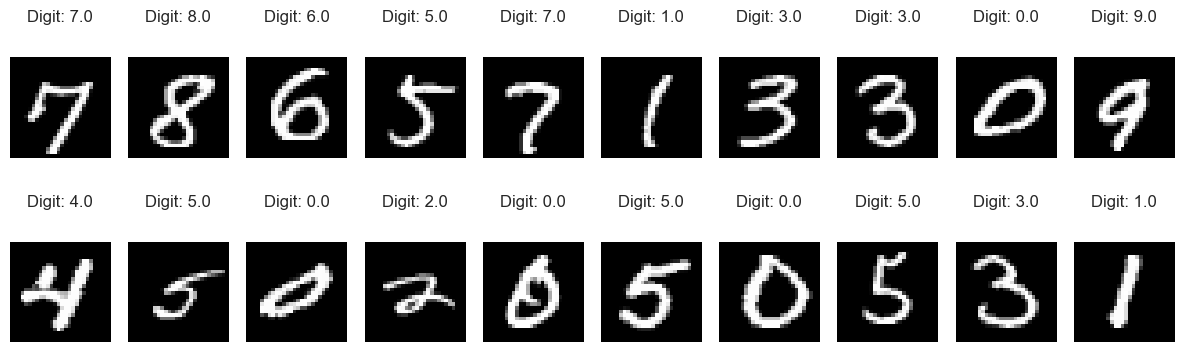

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Aseguramos que la columna 'label' esté en el DataFrame y el índice esté reseteado
df['label'] = y.astype(str)
df = df.reset_index(drop=True)

# Generar una permutación aleatoria de índices para muestreo
np.random.seed(42)  # para reproducibilidad
rnd_perm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure(figsize=(12, 6))
for i in range(20):
    ax = fig.add_subplot(3, 10, i + 1, title='Digit: ' + df.loc[rnd_perm[i], 'label'])
    ax.matshow(df.loc[rnd_perm[i], feat_cols].values.reshape((28, 28)).astype(float))
    ax.axis('off')  # Ocultar ejes para mejor visualización
plt.tight_layout()
plt.show()

In [141]:
n_sne = 7000
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rnd_perm[:n_sne], feat_cols].values)
print('t-SNE done! Time elapsed:', time.time() - time_start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.031s...
[t-SNE] Computed neighbors for 7000 samples in 0.993s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.217271
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.382591
[t-SNE] KL divergence after 300 iterations: 2.551076
t-SNE done! Time elapsed: 25.40848445892334


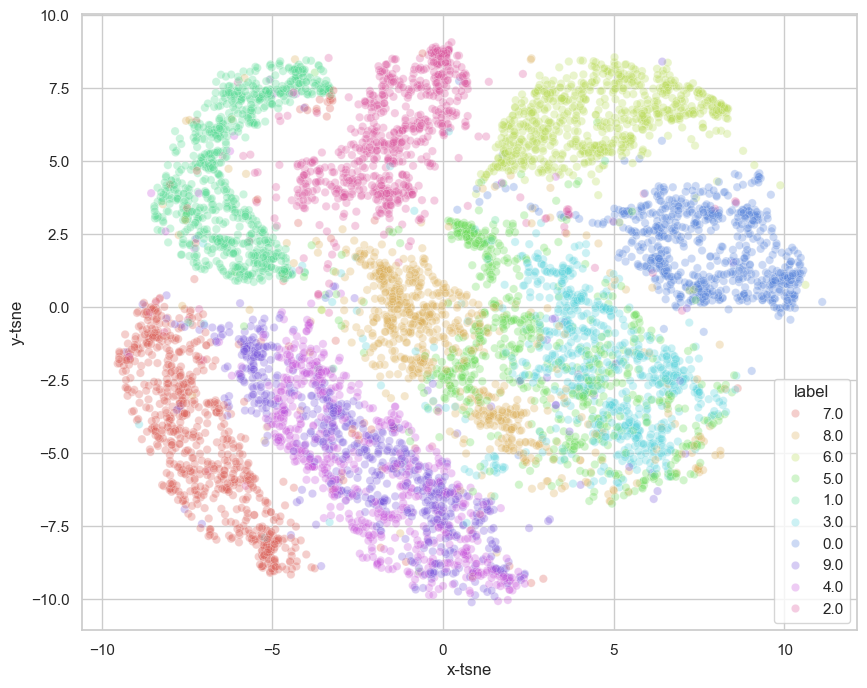

In [145]:
df_tsne = df.loc[rnd_perm[:n_sne]].copy()
df_tsne['x-tsne'] = tsne_results[:, 0]
df_tsne['y-tsne'] = tsne_results[:, 1]
sns.scatterplot(x='x-tsne', y='y-tsne', hue='label', palette=sns.color_palette('hls', 10),
                data=df_tsne, legend='full', alpha=.3)
plt.show()

### Comentario

El análisis comienza aplicando la técnica t-SNE, un método avanzado de reducción de dimensionalidad especialmente útil para visualizar datos de alta dimensión en dos dimensiones. Aquí se configura con 2 componentes, una perplexidad de 40 y un número máximo de iteraciones de 300. Se emplea una muestra aleatoria de 7000 imágenes para facilitar el procesamiento y evitar sobrecarga computacional.

Durante la ejecución, se observa el progreso detallado en la consola, mostrando cálculos de vecinos más cercanos y probabilidades condicionales, así como la divergencia KL que indica la calidad de la convergencia del algoritmo.

Posteriormente, los resultados obtenidos (las coordenadas en el espacio reducido 2D) se añaden al DataFrame original para cada muestra seleccionada. La visualización se realiza mediante un gráfico de dispersión coloreado por la etiqueta de cada dígito (del 0 al 9). Se utiliza una paleta de colores diversificada para distinguir claramente las distintas clases.

La representación gráfica muestra cómo t-SNE logra agrupar las imágenes de dígitos similares cercanas entre sí, facilitando la identificación visual de clusters naturales en los datos. Esta técnica es particularmente poderosa para entender la estructura subyacente en datos complejos y de alta dimensión como imágenes.

En resumen, t-SNE permite explorar la distribución y agrupación de los datos de manera intuitiva, evidenciando la capacidad del método para separar las diferentes clases de dígitos en un espacio bidimensional, lo que resulta valioso para tareas de análisis exploratorio y preprocesamiento en problemas de clasificación.
